#

#### Урок 8. Работа с данными

1.  Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2.  Загрузите датасет в pandas DataFrame под названием df.
3.  Выполните предварительную обработку данных, выполнив следующие шаги:

- a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).
- b. Проверьте и обработайте любые дублирующиеся строки в датасете.
- c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

4.  Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

- a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?
- b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?
- c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d.  
  Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

5.  Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
6.  Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.


In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# import phik
from itertools import product


Загрузите датасет в pandas DataFrame под названием df.


In [22]:
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Выполните предварительную обработку данных, выполнив следующие шаги:

- a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
pd.set_option("display.max_rows", None)
print(df.isnull().sum())
pd.reset_option("display.max_rows")


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [25]:
# определяем столбцы, которые нужно удалить, указаны в списке «columns_to_remove»
columns_with_name = ["Alley", "MasVnrType", "BsmtExposure", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]


df = df.drop(columns=columns_with_name)


In [27]:
# вичисляем  среднее значение для столбцов «LotFrontage» и «MasVnrArea» в DataFrame .
columns_with_name = ["LotFrontage", "MasVnrArea"]



for column in columns_with_name:


    average_value = df[column].mean()
    print(average_value)
    df[column] = df[column].fillna(average_value)


70.04995836802665
103.68526170798899


In [28]:
# Этот фрагмент кода перебирает список имен столбцов («columns_to_mode») и для каждого столбца находит наиболее часто используемое значение этого столбца. Затем он заполняет все недостающие значения в этом столбце вычесленным значением.
columns_with_name = ["BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
for column in columns_with_name:
    frequently_value = df[column].mode()
    df[column] = df[column].fillna(frequently_value[0])


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- b. Проверьте и обработайте любые дублирующиеся строки в датасете.


In [33]:
duplicates = df.duplicated()
df[duplicates]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


- c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).


In [35]:
df.describe().round(1)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,180.6,456.1,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,164.2,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [37]:
# Проверка всех вариантов значений в объектных столбцах датафрейма
for column_name in df.columns:
    # Проверяем, является ли столбец объектным типом
    if df[column_name].dtype == "object":
        # Получаем уникальные значения в столбце
        unique_values = df[column_name].unique()
        # Выводим уникальные значения в столбце
        print(f"Найдены уникальные значения в столбце '{column_name}': {unique_values}")


Найдены уникальные значения в столбце 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Найдены уникальные значения в столбце 'Street': ['Pave' 'Grvl']
Найдены уникальные значения в столбце 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Найдены уникальные значения в столбце 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Найдены уникальные значения в столбце 'Utilities': ['AllPub' 'NoSeWa']
Найдены уникальные значения в столбце 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Найдены уникальные значения в столбце 'LandSlope': ['Gtl' 'Mod' 'Sev']
Найдены уникальные значения в столбце 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Найдены уникальные значения в столбце 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Найдены уникальные значения в столбце 'Condi

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

- a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?


In [38]:
df["SalePrice"].describe().round(2)


count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

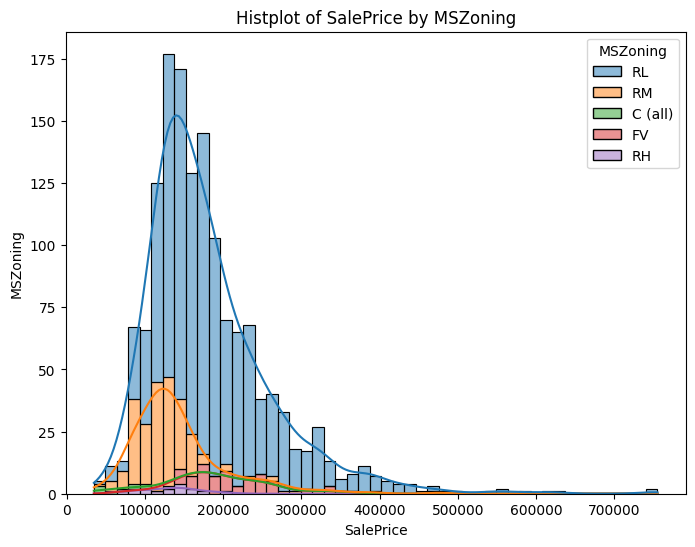

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x="SalePrice", hue="MSZoning", kde=True, multiple="stack")
plt.title("Histplot of SalePrice by MSZoning")
plt.xlabel("SalePrice")
plt.ylabel("MSZoning")
plt.show()


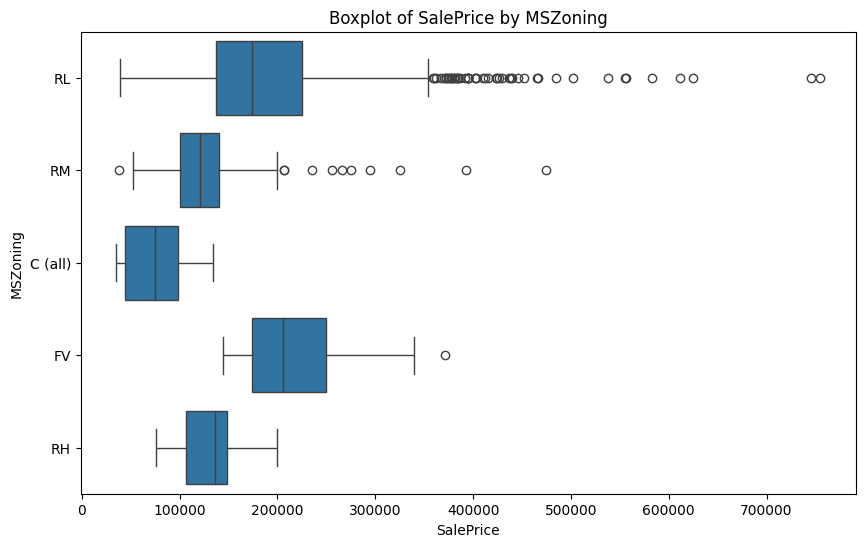

In [49]:
# Создание коробчатой диаграммы
plt.figure(figsize=(10, 6))
sns.boxplot(x="SalePrice", y="MSZoning", data=df)
plt.title("Boxplot of SalePrice by MSZoning")
plt.xlabel("SalePrice")
plt.ylabel("MSZoning")
plt.show()


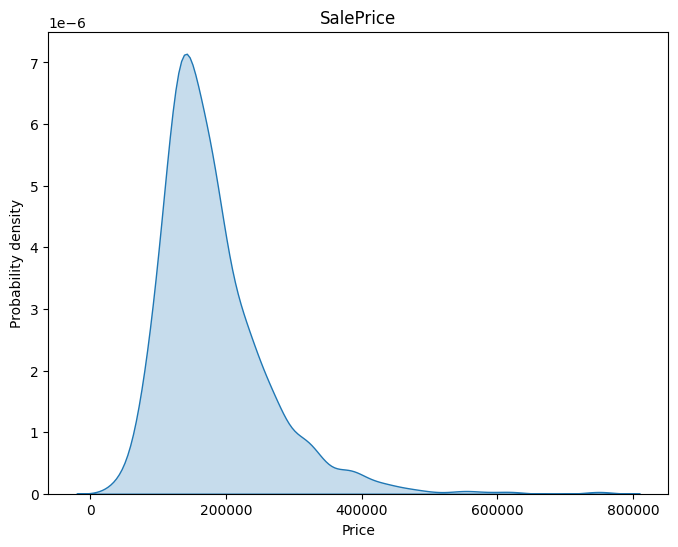

In [52]:
# График оценки плотности для данных «SalePrice»
plt.figure(figsize=(8, 6))
sns.kdeplot(df["SalePrice"], fill=True)
plt.title("SalePrice")
plt.xlabel("Price")
plt.ylabel("Probability density")


plt.show()


In [53]:
# Расчет Z-статистики для определения выбросов в столбце 'SalePrice'
sale_price_z_scores = stats.zscore(df["SalePrice"])

# Определение выбросов на основании Z-статистики
# Выбросы считаются теми значениями, которые отклоняются от среднего значения более чем на 3 стандартных отклонения
outliers_sale_price_z_scores = df[(sale_price_z_scores < -3) | (sale_price_z_scores > 3)]

# Расчет межквантильного интервала для столбца 'SalePrice'
first_quartile = df["SalePrice"].quantile(0.25)
third_quartile = df["SalePrice"].quantile(0.75)
interquartile_range = third_quartile - first_quartile

# Определение выбросов на основании межквантильного интервала
# Выбросы считаются теми значениями, которые находятся ниже (Q1 - 1.5 * IQR) или выше (Q3 + 1.5 * IQR)
outliers_iqr_sale_price = df[(df["SalePrice"] < (first_quartile - 1.5 * interquartile_range)) | (df["SalePrice"] > (third_quartile + 1.5 * interquartile_range))]


In [70]:
pd.set_option("display.max_rows", None)
print(f"Идентификаторы записей для значений цен-выбросов на основании Z-статистики:\n{outliers_sale_price_z_scores[["Id", "SalePrice"]]}")


Идентификаторы записей для значений цен-выбросов на основании Z-статистики:
        Id  SalePrice
58      59     438780
178    179     501837
185    186     475000
349    350     437154
389    390     426000
440    441     555000
473    474     440000
496    497     430000
527    528     446261
591    592     451950
664    665     423000
691    692     755000
769    770     538000
798    799     485000
803    804     582933
898    899     611657
1046  1047     556581
1142  1143     424870
1169  1170     625000
1182  1183     745000
1243  1244     465000
1373  1374     466500


In [69]:
print(f"Идентификаторы записей для значений цен-выбросов на основании межквантильного интервала:\n{outliers_iqr_sale_price[["Id", "SalePrice"]]}")
pd.reset_option("display.max_rows")


Идентификаторы записей для значений цен-выбросов на основании межквантильного интервала:
        Id  SalePrice
11      12     345000
53      54     385000
58      59     438780
112    113     383970
151    152     372402
161    162     412500
178    179     501837
185    186     475000
224    225     386250
231    232     403000
278    279     415298
309    310     360000
313    314     375000
320    321     342643
321    322     354000
336    337     377426
349    350     437154
378    379     394432
389    390     426000
440    441     555000
473    474     440000
477    478     380000
481    482     374000
496    497     430000
515    516     402861
527    528     446261
585    586     369900
591    592     451950
608    609     359100
642    643     345000
644    645     370878
654    655     350000
661    662     402000
664    665     423000
678    679     372500
688    689     392000
691    692     755000
702    703     361919
718    719     341000
769    770     538000
774    77

- b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?


In [72]:
# Этот фрагмент кода вычисляет коэффициенты корреляции Спирмена и значения p между переменной «SalePrice» и всеми другими количественными переменными
variable = "SalePrice"

# Выбор только количественных(числовых) переменных
quantitative_vars = df.select_dtypes(include=["int64", "float64"])

# Рассчет коэффициента корреляции Спирмена и p-value
results = {}
for col in quantitative_vars.columns:
    if col != variable:
        spearman_corr, p_value = spearmanr(df[variable], df[col])
        results[col] = {"Spearman_corr": spearman_corr, "p_value": p_value}

results_df = pd.DataFrame.from_dict(results, orient="index")

print("Коэффициенты корреляции Спирмена и их р-значения с переменной ", variable, ":")
print(results_df)


Коэффициенты корреляции Спирмена и их р-значения с переменной  SalePrice :
               Spearman_corr        p_value
Id                 -0.018546   4.788948e-01
MSSubClass          0.007192   7.836360e-01
LotFrontage         0.390963   1.616631e-54
LotArea             0.456461   4.871581e-76
OverallQual         0.809829   0.000000e+00
OverallCond        -0.129325   7.118552e-07
YearBuilt           0.652682  5.693841e-178
YearRemodAdd        0.571159  3.557233e-127
MasVnrArea          0.422884   2.059129e-64
BsmtFinSF1          0.301871   3.857909e-32
BsmtFinSF2         -0.038806   1.383221e-01
BsmtUnfSF           0.185197   9.886861e-13
TotalBsmtSF         0.602725  4.157300e-145
1stFlrSF            0.575408  1.780246e-129
2ndFlrSF            0.293598   2.040344e-30
LowQualFinSF       -0.067719   9.645078e-03
GrLivArea           0.731310  1.431015e-244
BsmtFullBath        0.225125   3.130150e-18
BsmtHalfBath       -0.012189   6.416775e-01
FullBath            0.635957  2.729574e-166
H

In [75]:
# Фильтруем переменные, у которых коэффициент корреляции Спирмена превышает 0,7 и значение p меньше или равно 0,05, что указывает на сильную и статистически значимую корреляцию с переменной «SalePrice».
strong_correlations = {col: values for col, values in results.items() if values["Spearman_corr"] > 0.7 and values["p_value"] <= 0.05}

sstrong_correlations_df = pd.DataFrame.from_dict(strong_correlations, orient="index")
print(f"Важные высокие корреляции между переменной 'SalePrice' и другими переменными:\n{sstrong_correlations_df}")


Важные высокие корреляции между переменной 'SalePrice' и другими переменными:
             Spearman_corr        p_value
OverallQual       0.809829   0.000000e+00
GrLivArea         0.731310  1.431015e-244


c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.


In [76]:
columns_with_name = ["OverallQual", "GrLivArea", "GarageCars"]
df[columns_with_name].describe().round(2)


,OverallQual,GrLivArea,GarageCars
count,1460.00,1460.00,1460.00
mean,6.10,1515.46,1.77
std,1.38,525.48,0.75
min,1.00,334.00,0.00
25%,5.00,1129.50,1.00
50%,6.00,1464.00,2.00
75%,7.00,1776.75,2.00
max,10.00,5642.00,4.00


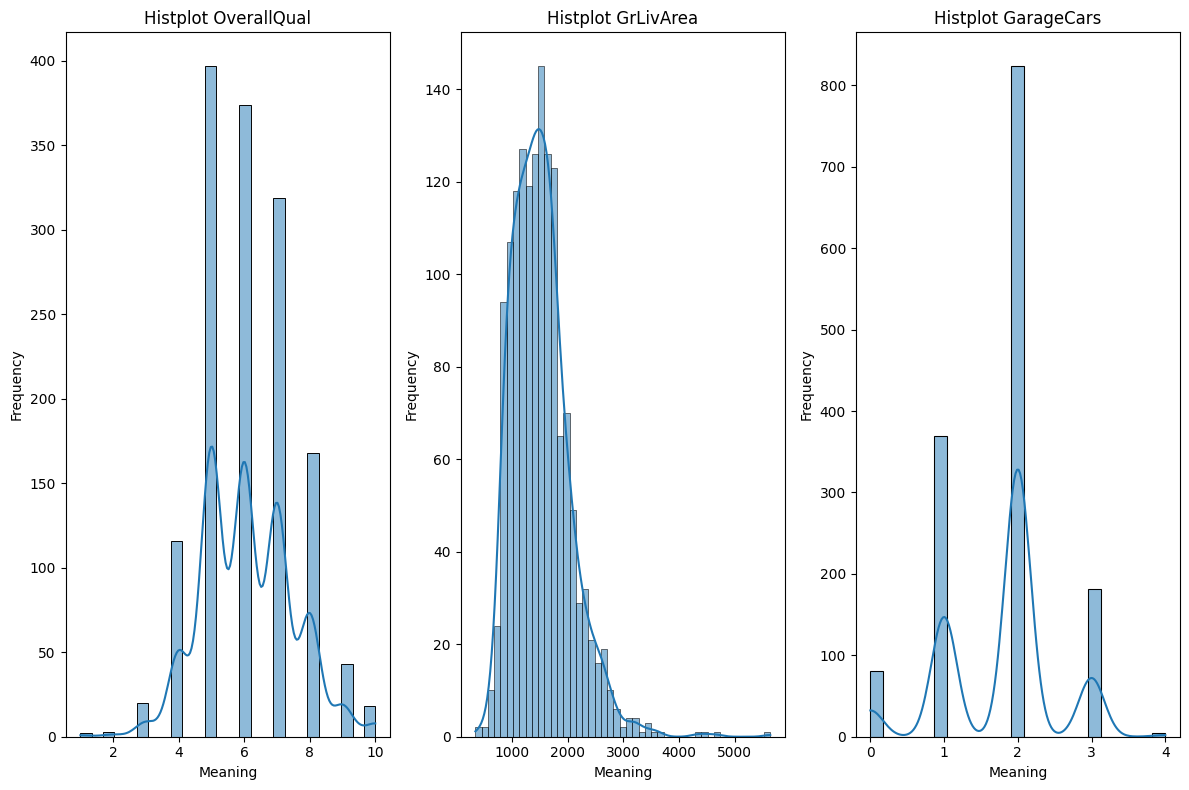

In [78]:
# Гистограмма
num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(columns_with_name):
    sns.histplot(data=df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Histplot {col}")
    axes[i].set_xlabel("Meaning")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Вывод: 
переменные 'OverallQual' и 'GarageCars' демонстрируют мультимодальное распределение, в то время как переменная 'GrLivArea' имеет лог-нормальное распределение.

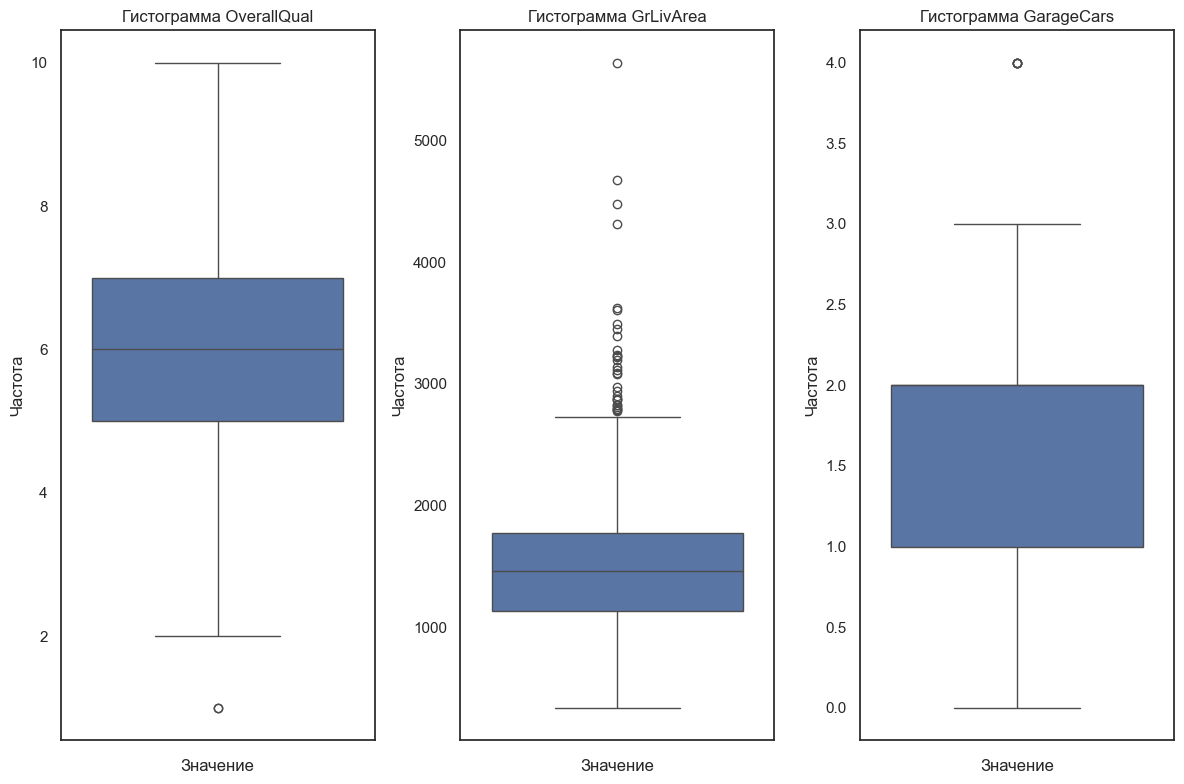

In [195]:
# Отрисовка гистограммы распределения важных переменных
num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant_variables):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")
    axes[i].set_xlabel("Meaning")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Вывод:
Переменная 'OverallQual' не демонстрирует выбросов, переменная 'GarageCars' имеет одно значительно отклоняющееся значение, а переменная 'GrLivArea' содержит множество выбросов

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.


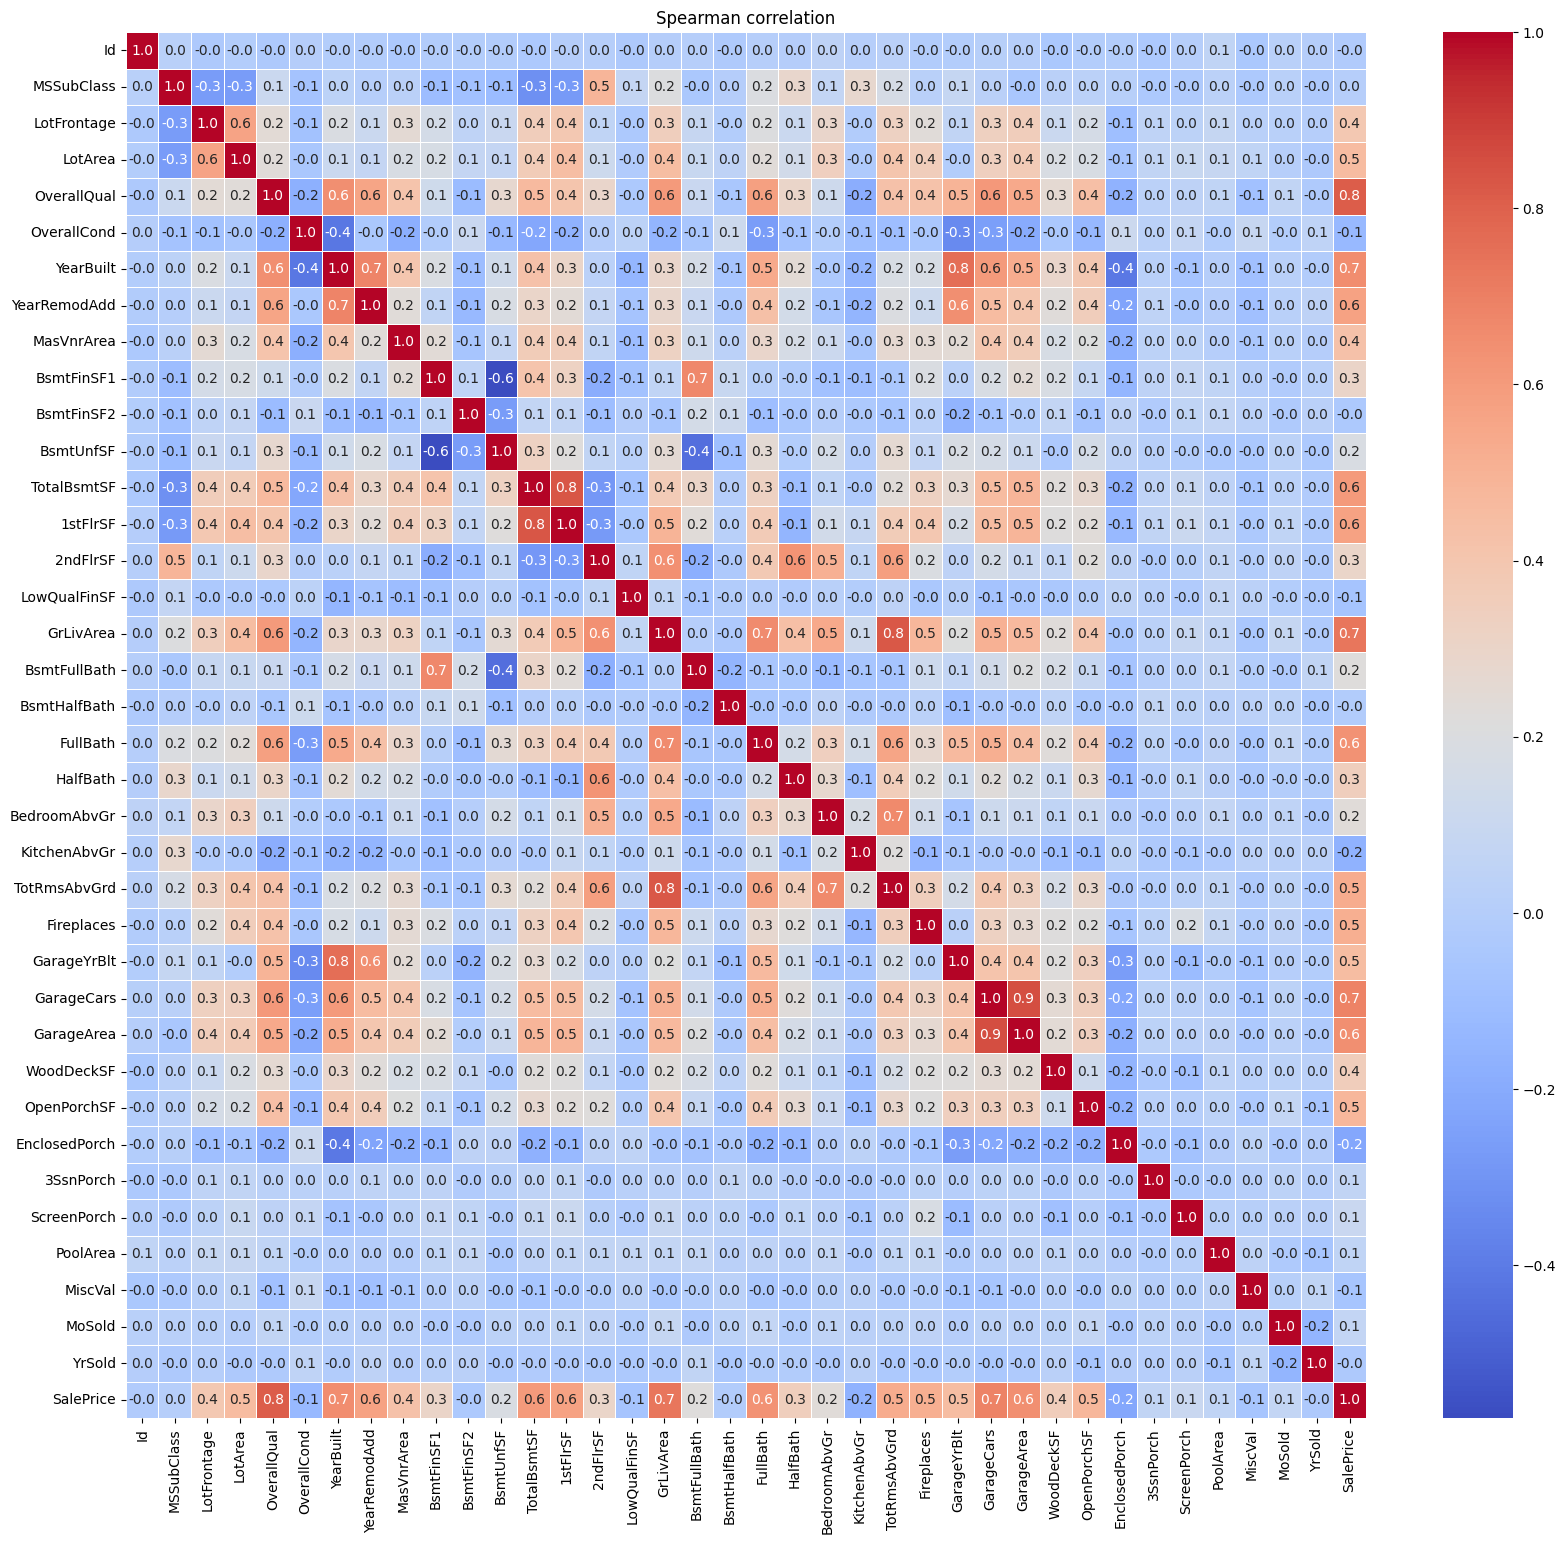

In [82]:
# вычисляет матрицу корреляции Спирмена для количественных переменных в наборе данных, а затем строит тепловую карту для визуализации корреляций между  переменными.
corr_matrix_spearman = quantitative_vars.corr(method="spearman")


plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix_spearman, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Spearman correlation")
plt.show()


##### Переменные с наибольшей корреляцией:

- `OverallQual` (Общее качество материала и отделки)
- `YearBuilt` (Первоначальная дата постройки)
- `YearRemodAdd` (Дата ремонта)
- `TotalBsmtSF` (Общая площадь подвала в квадратных метрах)
- `2ndFlrSF` (Площадь второго этажа, кв.)
- `GrLivArea` (Жилая площадь над уровнем земли (земля), квадратные футы)
- `FullBath` (Полноценные ванные комнаты над уровнем моря)
- `GarageCars` (Размер гаража по вместимости автомобиля)
- `SalePrice` (Цена продажи)

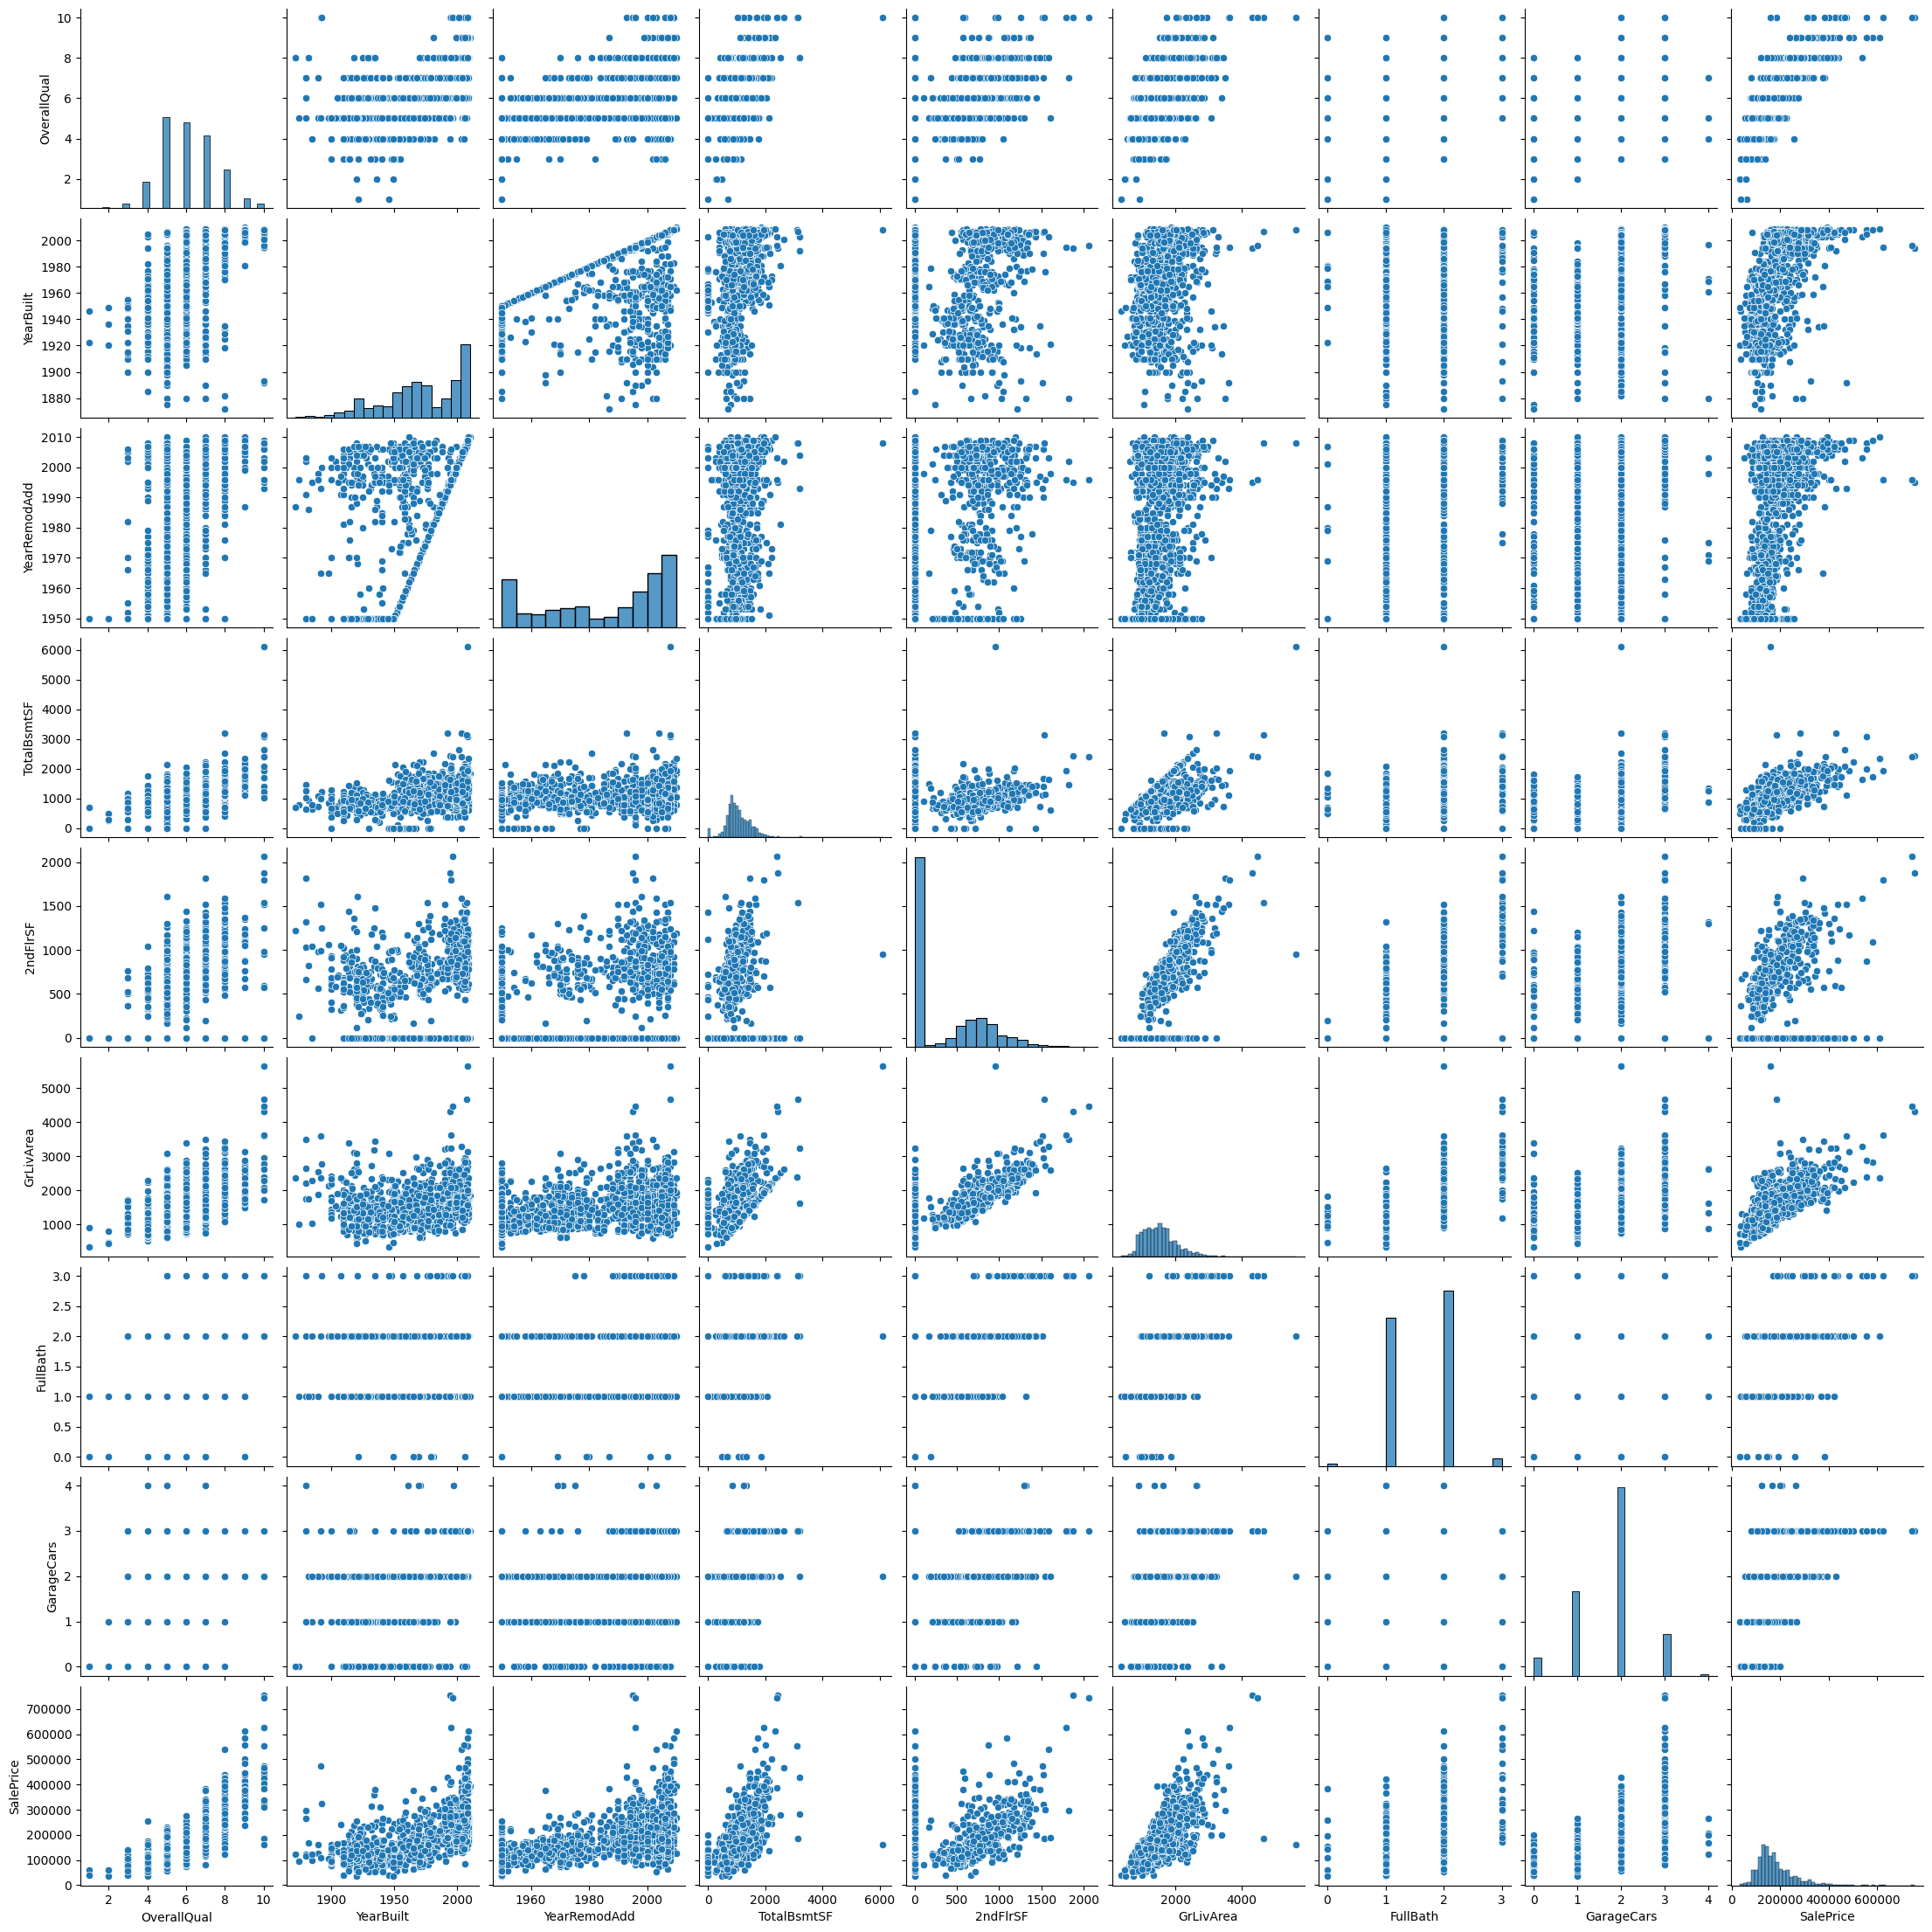

In [83]:
# создание парного графика для визуализации попарных отношений между выбранными столбцами.
columns_with_name = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "2ndFlrSF", "GrLivArea", "FullBath", "GarageCars", "SalePrice"]

selected_df = df[columns_with_name]
sns.pairplot(selected_df)


Выполните проектирование признаков путем реализации следующих преобразований:  
- a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.


In [85]:
pd.reset_option("display.max_rows")
df_one_hot = pd.get_dummies(df, columns=["GarageType"])
df_one_hot


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,False,True,False,False,False,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,False,True,False,False,False,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,False,True,False,False,False,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,False,False,False,False,False,True
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,False,True,False,False,False,False
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,False,True,False,False,False,False
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,False,True,False,False,False,False
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,False,True,False,False,False,False


In [87]:
# создаем словарь сопоставления label_ranks, который присваивает числовые значения категориальным меткам столбца GarageQual. Словарь сопоставляет метки «Ex» с номером 1, «Gd» с номером 2, «TA» с номером 3, «Fa» с номером 4 и «Po» с номером 5.
label_ranks = {"Ex": 1, "Gd": 2, "TA": 3, "Fa": 4, "Po": 5}
df_one_hot["encoded_GarageQual"] = df_one_hot["GarageQual"].map(label_ranks)


In [89]:
# Проверка результатов перекодирования
selected_columns = ["GarageQual", "encoded_GarageQual"]
unique_df = df_one_hot[["GarageQual", "encoded_GarageQual"]].drop_duplicates()
unique_df


,GarageQual,encoded_GarageQual
0,TA,3
8,Fa,4
9,Gd,2
185,Ex,1
246,Po,5


- b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.


In [91]:
# Этот код создает новый столбец в DataFrame df_one_hot под названием «Гараж». Значения в этом новом столбце будут True, если какой-либо из выбранных столбцов («GarageType_2Types», «GarageType_Attchd», «GarageType_Basment», «GarageType_BuiltIn», «GarageType_CarPort», «GarageType_Detchd») имеет значение True

selected_columns = ["GarageType_2Types", "GarageType_Attchd", "GarageType_Basment", "GarageType_BuiltIn", "GarageType_CarPort", "GarageType_Detchd"]
df_one_hot["Garage"] = df_one_hot[selected_columns].any(axis=1)
df_one_hot


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,encoded_GarageQual,Garage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Normal,208500,False,True,False,False,False,False,3,True
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Normal,181500,False,True,False,False,False,False,3,True
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Normal,223500,False,True,False,False,False,False,3,True
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,False,False,False,False,False,True,3,True
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Normal,250000,False,True,False,False,False,False,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,Normal,175000,False,True,False,False,False,False,3,True
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,Normal,210000,False,True,False,False,False,False,3,True
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,Normal,266500,False,True,False,False,False,False,3,True
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,Normal,142125,False,True,False,False,False,False,3,True


6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.


In [92]:
df_one_hot.to_csv("cleaned_house_prices.csv", index=False)
